In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('C:\\Users\\thais\\Desktop\\redesneurais\\db.csv')
print(df.head())


      t0     t1     t2     t3     t4     t5     t6     t7     t8     t9  ...  \
0  24.00  24.00  23.00  25.00  24.00  25.00  24.00  24.00  22.00  25.00  ...   
1  23.00  23.00  22.00  21.00  21.00  22.00  23.00  23.00  22.00  21.00  ...   
2  -0.55  -0.55  -0.55   3.45  13.45  11.45  18.45  18.45  20.45  20.45  ...   
3  12.30  10.30  15.30  15.30  16.30  15.30  17.30  16.30  17.30  15.30  ...   
4  24.85   2.85   5.85  -1.15   2.85  -1.15   1.85  -1.15   0.85  -1.15  ...   

   t191  t192  t193  t194  t195  t196  t197  t198  t199  Classes  
0  1.00 -1.00  1.00 -1.00  1.00  0.00  1.00  0.00  0.00        1  
1 -1.00  1.00  0.00  1.00 -1.00  0.00 -1.00  1.00  0.00        1  
2 -0.55  0.45 -0.55  0.45 -0.55  0.45 -0.55  0.45 -0.55        1  
3 -0.70  0.30 -0.70  0.30 -0.70  1.30 -0.70  1.30 -0.70        1  
4 -0.15  0.85 -1.15 -0.15 -1.15  0.85 -0.15  0.85 -0.15        2  

[5 rows x 201 columns]


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 201 entries, t0 to Classes
dtypes: float64(200), int64(1)
memory usage: 157.2 KB


In [3]:
#verificar se há dados ausentes
print(df.isnull().sum())


t0         0
t1         0
t2         0
t3         0
t4         0
          ..
t196       0
t197       0
t198       0
t199       0
Classes    0
Length: 201, dtype: int64


In [4]:
def imprimir_nomes_classes(dataframe):
    nomes_colunas = dataframe.columns
    nomes_colunas.columns.astype(str)
    for nome in nomes_colunas:
        print(nome)


In [5]:
df.Classes.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

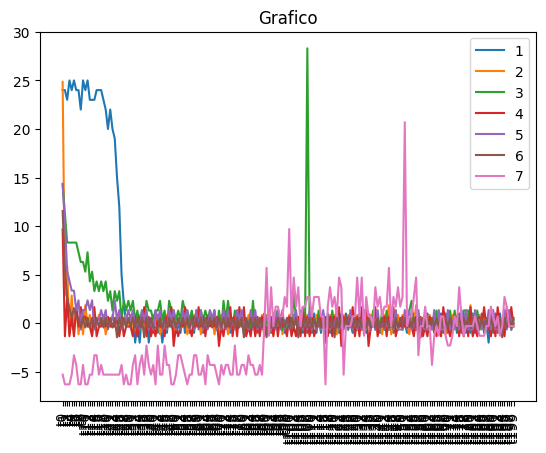

In [6]:
#separar os dados em grupos pelas Classes
grupos = df.groupby('Classes')
exemplos = grupos.first()
for classes, exemplo in exemplos.iterrows():
        plt.plot(exemplo, label = str(classes))
        plt.title("Grafico")
plt.legend(loc="upper right")
plt.xticks(rotation = 90)
plt.show()

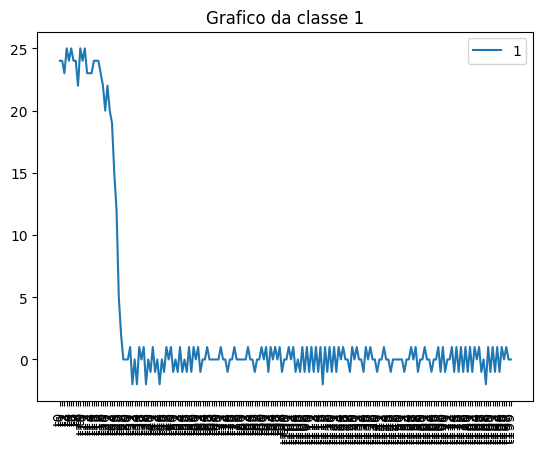

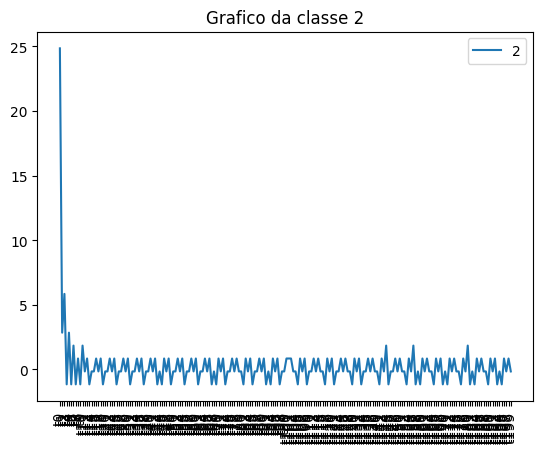

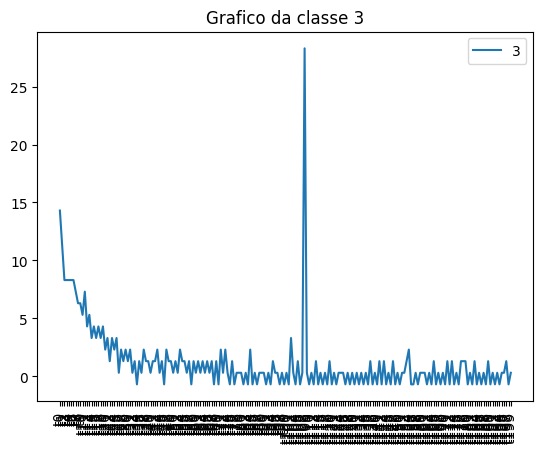

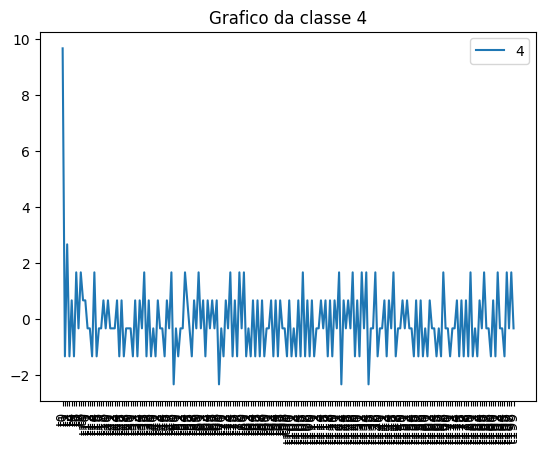

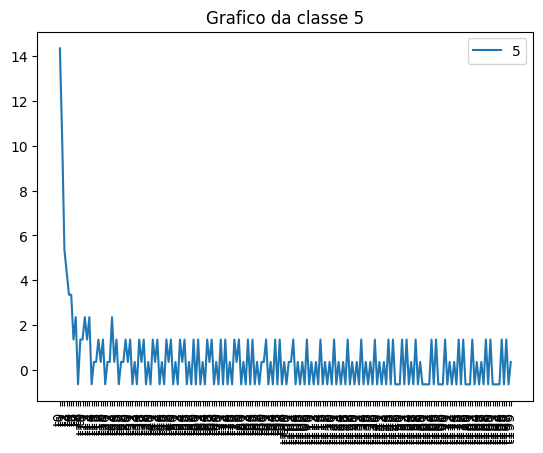

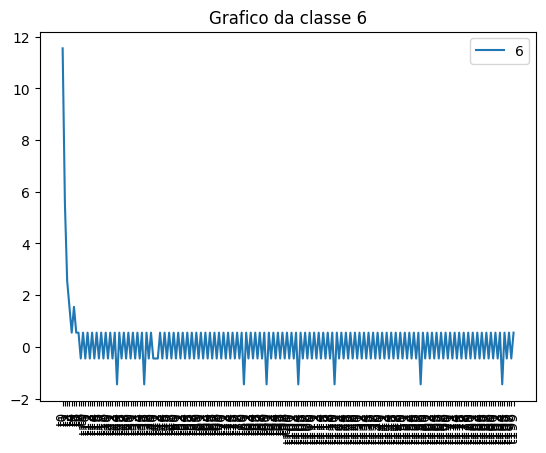

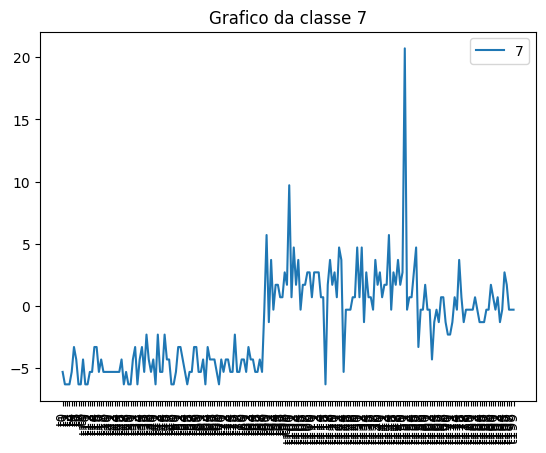

In [7]:
grupos = df.groupby('Classes')
exemplos = grupos.first()
for classes, exemplo in exemplos.iterrows():
    plt.plot(exemplo, label = str(classes))
    plt.title(f"Grafico da classe {str(classes)}")
    plt.legend(loc="upper right")
    plt.xticks(rotation = 90)
    plt.show()

In [8]:
labels = pd.get_dummies(df['Classes'])
df = pd.concat([df, labels], axis=1)
df

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t198,t199,Classes,1,2,3,4,5,6,7
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,0.00,0.00,1,True,False,False,False,False,False,False
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,1.00,0.00,1,True,False,False,False,False,False,False
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,0.45,-0.55,1,True,False,False,False,False,False,False
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,1.30,-0.70,1,True,False,False,False,False,False,False
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,0.85,-0.15,2,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,-1.30,-0.30,5,False,False,False,False,True,False,False
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,-0.45,0.55,6,False,False,False,False,False,True,False
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,0.35,-0.65,6,False,False,False,False,False,True,False
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,0.70,-1.30,7,False,False,False,False,False,False,True


In [9]:
#Eliminando a coluna de classes:
df.drop('Classes', axis = 1, inplace=True)

In [10]:
#Criando os datasets de treino e teste:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [11]:
#X_train, X_test, y_train, y_test = train_test_split(
#df.iloc[:,:-1], df.iloc[:,-1], test_size=0.33, random_state=42)
y = df[[1,2,3,4,5,6,7]]
x = df.drop([1,2,3,4,5,6,7], axis=1)

In [12]:
#X_train2, X_val, y_train2, y_val = train_test_split(
#X_train , y_train,  test_size=0.2, random_state=42)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=1, test_size=0.3)

In [14]:
#Definindo uma função para rodar a rede neural:
from sklearn.neural_network import MLPClassifier

def RedeNeural(ls,rs,mi,vf,vb,lr,xtr,ytr,xts,yts):
    clf = MLPClassifier(hidden_layer_sizes= ls, random_state=rs, max_iter=mi, validation_fraction= vf, verbose=vb, learning_rate_init=lr).fit(xtr, ytr)
    print('Score treino:',clf.score(xtr, ytr))
    print('Score teste:',clf.score(xts, yts))

In [15]:
#hidden_layer_sizes, random_state, max_iter, validation_fraction, verbose, learning_rate, x_train,y_train,x_test,y_test


RedeNeural(30,0,300,0.1,False,0.01,x_train,y_train,x_test,y_test)

Score treino: 1.0
Score teste: 0.6666666666666666


Definindo uma função para aplicar o grid search:


In [16]:
def Grid(parfix,pargrid,xtr,ytr,xts,yts):
    clfgrid = MLPClassifier(max_iter=parfix[0],random_state=parfix[1], validation_fraction= parfix[2], verbose=parfix[3])
#    clfgrid = MLPClassifier(max_iter=parfix[0],validation_fraction= parfix[1], verbose=parfix[2])
    gridmodel = GridSearchCV(clfgrid, pargrid)
    gridmodel.fit(xtr, ytr)
    #print(gridmodel.best_estimator_)
    model = gridmodel.best_estimator_
    #fita e testa o modelo com as características encontradas no GridSearch:
    model.fit(xtr, ytr)
    score_train = model.score(xtr, ytr)
    score_test = model.score(xts, yts)
    return model, score_train, score_test

In [17]:
parametersgr = {
              'activation':['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':range(1,10),
              'learning_rate_init':np.arange(0.001,0.01,0.005),
              'solver':['lbfgs', 'sgd', 'adam']
              }

In [18]:
max_i = 5000 #Maximum iteration
ran_st = 0   #Random state
val_frac = 0.1  #validation fraction - só é usado quando early_stop = True
verb = False  #Verbose
parametersfix = (max_i, ran_st,val_frac, verb)
parametersfix

(5000, 0, 0.1, False)

In [19]:
result = Grid(parametersfix,parametersgr,x_train,y_train,x_test,y_test)

c:\Users\thais\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\thais\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\thais\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptr

In [20]:
result

(MLPClassifier(activation='logistic', hidden_layer_sizes=5, max_iter=5000,
               random_state=0, solver='lbfgs'),
 1.0,
 0.7333333333333333)

In [21]:
bestgrid = result[0]
score_train = result[1]
score_test = result[2]
print('Melhores parâmetros:',bestgrid,  '\n Score treino:',score_train, '\n Score teste:',score_test)

Melhores parâmetros: MLPClassifier(activation='logistic', hidden_layer_sizes=5, max_iter=5000,
              random_state=0, solver='lbfgs') 
 Score treino: 1.0 
 Score teste: 0.7333333333333333


In [22]:
#Aplicando o modelo com os parâmetros encontrados pelo grid search:
y_pred = bestgrid.predict(x_test)

In [23]:
accuracy_score(y_test, y_pred)

0.7333333333333333

In [24]:
from sklearn.decomposition import PCA


In [25]:
class_report = classification_report(y_test, y_pred,output_dict=True, zero_division='warn')


c:\Users\thais\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
df_report = pd.DataFrame(columns=['classe', 'precisão', 'recall', 'f1-score', 'support'])
for classe, metrics in class_report.items():
    precisao = metrics['precision']
    recall = metrics['recall']
    f1 = metrics['f1-score']
    support = metrics['support']
    df_temp = pd.DataFrame({'classe': [classe], 'precisão': [precisao], 'recall': [recall], 'f1-score': [f1], 'support': [support]})
    df_report = pd.concat([df_report, df_temp], ignore_index=True)
df_report

C:\Users\thais\AppData\Local\Temp\ipykernel_8928\1243207445.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_report = pd.concat([df_report, df_temp], ignore_index=True)


,classe,precisão,recall,f1-score,support
0,0,1.000000,1.000000,1.000000,5.0
1,1,1.000000,0.714286,0.833333,7.0
2,2,1.000000,0.555556,0.714286,9.0
3,3,0.333333,1.000000,0.500000,2.0
4,4,1.000000,0.600000,0.750000,5.0
5,5,1.000000,1.000000,1.000000,1.0
6,6,1.000000,1.000000,1.000000,1.0
7,micro avg,0.846154,0.733333,0.785714,30.0
8,macro avg,0.904762,0.838549,0.828231,30.0
9,weighted avg,0.955556,0.733333,0.800397,30.0


In [27]:
import seaborn as sns


In [28]:
from sklearn.preprocessing import StandardScaler


In [29]:
#Matriz de correlação:
df_corr = pd.DataFrame(x_test)
corr = df_corr.corr()

<Axes: >

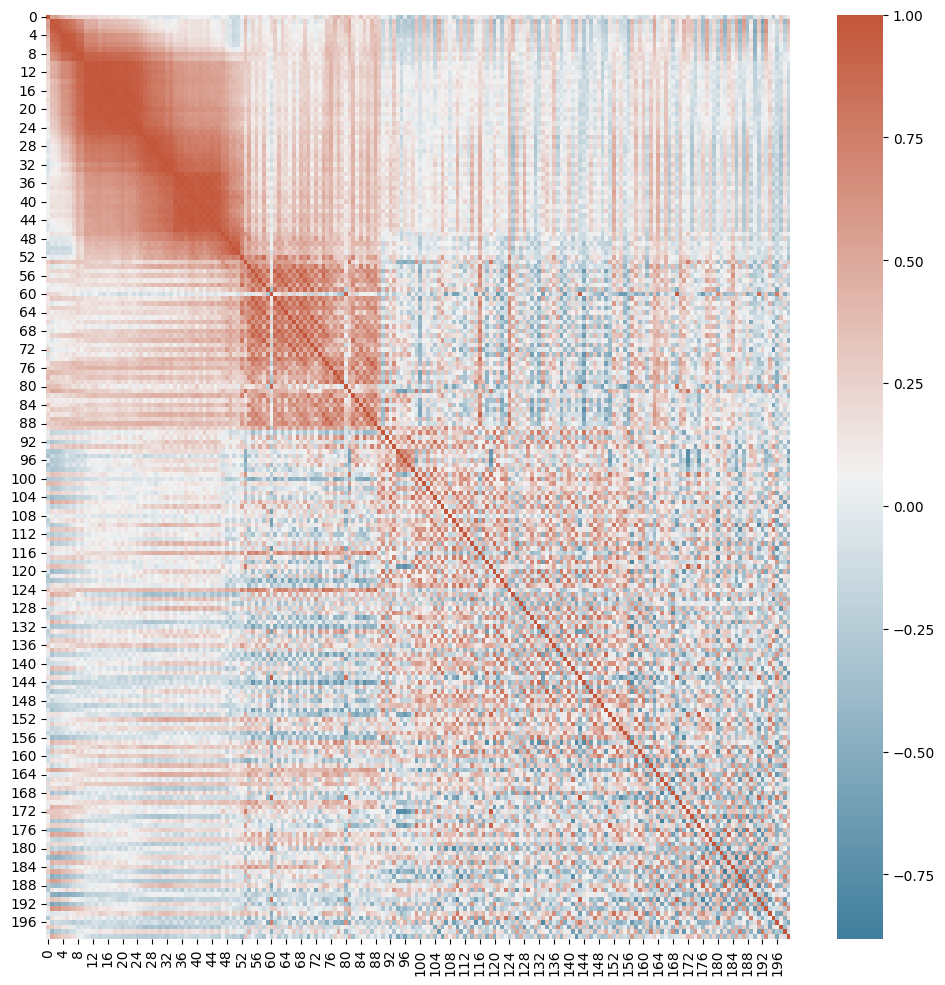

In [30]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(corr, cmap=cmap, ax=ax)#, mask=mask)

In [33]:
from paretochart.paretochart import pareto

In [34]:
def PlotaPCA(dfcorr, ncomponentes):
    pca = PCA(n_components=ncomponentes)
    pca.fit(dfcorr)
    fig, ax = plt.subplots(figsize=(16, 8))
    pareto(pca.explained_variance_ratio_);
    ax.set_xlabel('Components')
    ax.set_ylabel('Explained variance')
    plt.grid()

c:\Users\thais\AppData\Local\Programs\Python\Python312\Lib\site-packages\paretochart\paretochart.py:198: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(yt)


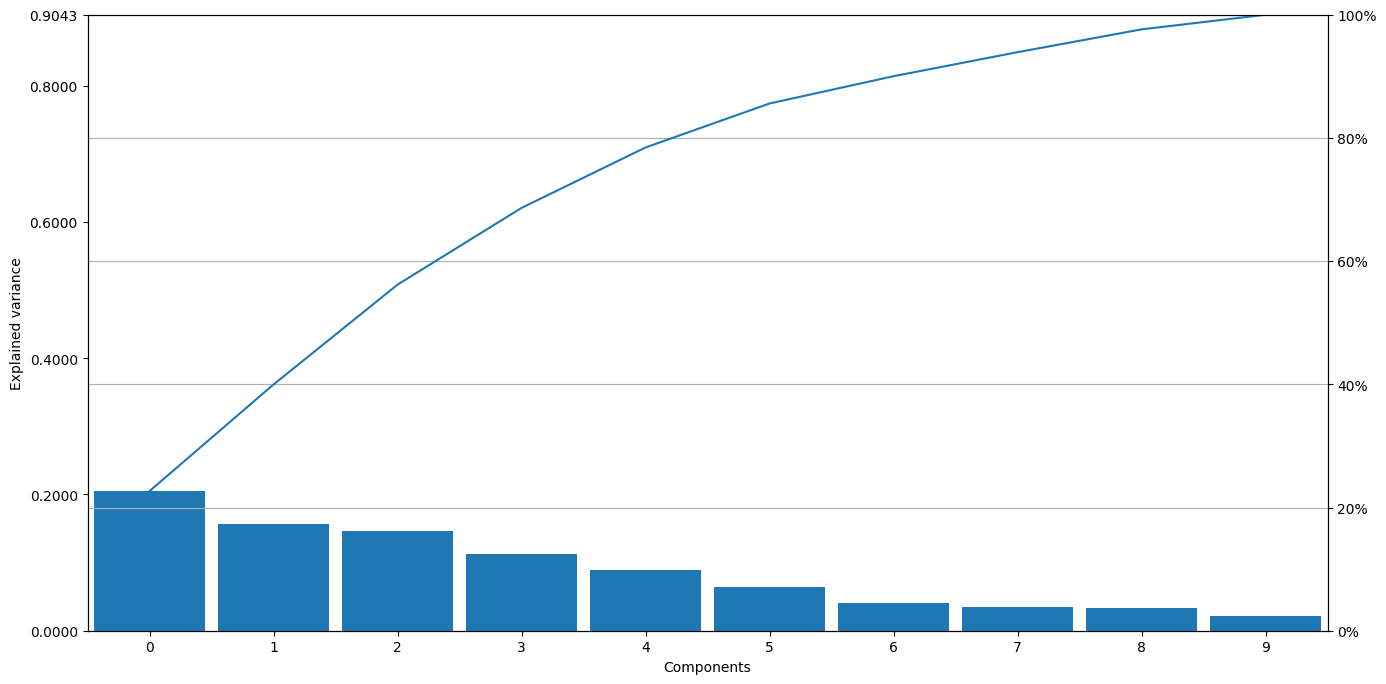

In [35]:
PlotaPCA(df_corr,0.9)

In [36]:
#Podemos ver pelo gráfico que atingimos cerca de 90% de variância explicada usando 14 componentes.
#Aplicando a PCA nos conjuntos de treino e teste:
pca = PCA(n_components = 14)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [37]:
clf_PCA = bestgrid.fit(x_train_pca, y_train)
score_train_pca = bestgrid.score(x_train_pca, y_train)
score_test_pca = bestgrid.score(x_test_pca, y_test)
print('Score treino:',score_train_pca)
print('Score teste:',score_test_pca)

Score treino: 1.0
Score teste: 0.7333333333333333


c:\Users\thais\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [38]:
y_PCA_pred = bestgrid.predict(x_test_pca)

In [41]:
class_report_pca = classification_report(y_test, y_pred, output_dict=True, zero_division='warn')
rep_pca = pd.DataFrame(columns=['classe', 'precisão', 'recall', 'f1-score', 'support'])
for item in class_report_pca:
    clas = item
    precis = class_report_pca[item]['precision']
    recall = class_report_pca[item]['recall']
    f1 = class_report_pca[item]['f1-score']
    sup = class_report_pca[item]['support']
    rep_pca = pd.concat([rep_pca, pd.DataFrame({'classe': [clas], 'precisão': [precis], 'recall': [recall], 'f1-score': [f1], 'support': [sup]})], ignore_index=True)
rep_pca

c:\Users\thais\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\thais\AppData\Local\Temp\ipykernel_8928\2083597395.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rep_pca = pd.concat([rep_pca, pd.DataFrame({'classe': [clas], 'precisão': [precis], 'recall': [recall], 'f1-score': [f1], 'support': [sup]})], ignore_index=True)


,classe,precisão,recall,f1-score,support
0,0,1.000000,1.000000,1.000000,5.0
1,1,1.000000,0.714286,0.833333,7.0
2,2,1.000000,0.555556,0.714286,9.0
3,3,0.333333,1.000000,0.500000,2.0
4,4,1.000000,0.600000,0.750000,5.0
5,5,1.000000,1.000000,1.000000,1.0
6,6,1.000000,1.000000,1.000000,1.0
7,micro avg,0.846154,0.733333,0.785714,30.0
8,macro avg,0.904762,0.838549,0.828231,30.0
9,weighted avg,0.955556,0.733333,0.800397,30.0


In [ ]:
#Tabela com resultado dos scores com e sem PCA:

In [43]:
tabela = pd.DataFrame(columns=['PCA', 'Score Treino', 'Score Teste'])
tabela = pd.concat([
    tabela,
    pd.DataFrame({'PCA': ['Sem PCA'], 'Score Treino': [score_train], 'Score Teste': [score_test]}),
    pd.DataFrame({'PCA': ['Com PCA'], 'Score Treino': [score_train_pca], 'Score Teste': [score_test_pca]})
], ignore_index=True)
tabela

C:\Users\thais\AppData\Local\Temp\ipykernel_8928\2396319506.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabela = pd.concat([


,PCA,Score Treino,Score Teste
0,Sem PCA,1.0,0.733333
1,Com PCA,1.0,0.733333


Concluímos então, que no nosso caso, a redução de dimensionalidade através da componente principal não resultou em melhora na precisão das previsões para o cojunto de dados testado.